<a href="https://colab.research.google.com/github/thevinaymittal/PractiseRepo/blob/master/Games_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection, metrics, preprocessing

Above we verify and import crucial tools(frameworks)

#Next, Load the dataset, Do some preprocessing & lastly Visualize

In [0]:
#Loading Dataset

games = pd.read_csv("https://raw.githubusercontent.com/ThaWeatherman/scrapers/master/boardgamegeek/games.csv")

In [31]:
#Preprocessing if required

#Step 1: Quick look

games.describe()


,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
count,81312.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81309.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000,81312.000000
mean,72278.150138,1806.630668,1.992018,5.637703,51.634788,49.276833,51.634788,6.983975,161.886585,4.212144,1.157632,262.502509,9.236423,12.688890,42.719144,49.290031,16.488009,0.908083
std,58818.237742,588.517834,0.931034,56.076890,345.699969,334.483934,345.699969,5.035138,1145.978126,3.056551,2.340033,1504.536693,39.757408,60.764207,239.292628,284.862853,115.980285,1.176002
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21339.750000,1984.000000,2.000000,2.000000,8.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43258.000000,2003.000000,2.000000,4.000000,30.000000,30.000000,30.000000,8.000000,2.000000,5.265620,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,128836.500000,2010.000000,2.000000,6.000000,60.000000,60.000000,60.000000,12.000000,16.000000,6.718777,0.000000,51.000000,2.000000,3.000000,7.000000,9.000000,2.000000,1.916700
max,184451.000000,2018.000000,99.000000,11299.000000,60120.000000,60120.000000,60120.000000,120.000000,53680.000000,10.000000,8.221860,73188.000000,1395.000000,1586.000000,6402.000000,11798.000000,5996.000000,5.000000


In [32]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
id                      81312 non-null int64
type                    81312 non-null object
name                    81271 non-null object
yearpublished           81309 non-null float64
minplayers              81309 non-null float64
maxplayers              81309 non-null float64
playingtime             81309 non-null float64
minplaytime             81309 non-null float64
maxplaytime             81309 non-null float64
minage                  81309 non-null float64
users_rated             81312 non-null int64
average_rating          81312 non-null float64
bayes_average_rating    81312 non-null float64
total_owners            81312 non-null int64
total_traders           81312 non-null int64
total_wanters           81312 non-null int64
total_wishers           81312 non-null int64
total_comments          81312 non-null int64
total_weights           81312 non-null int64
average_weight  

In [0]:
##Step 2 : DIFERS Drop-Impute-Fill-Encode-Replace-Scaling


##Removing missing values (if any)

games= games.dropna(axis=0)

##Removing all non reviews

games= games[games['users_rated']>0]


In [0]:
##Step 3 : Specifying etcetra options


seed = 42
results =[]
KFold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'accuracy'


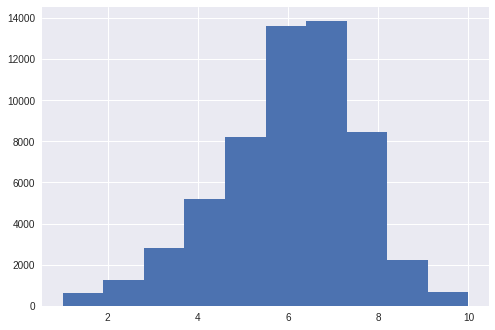

In [35]:
###Visualize then correlate

plt.hist(games['average_rating'])
plt.show()


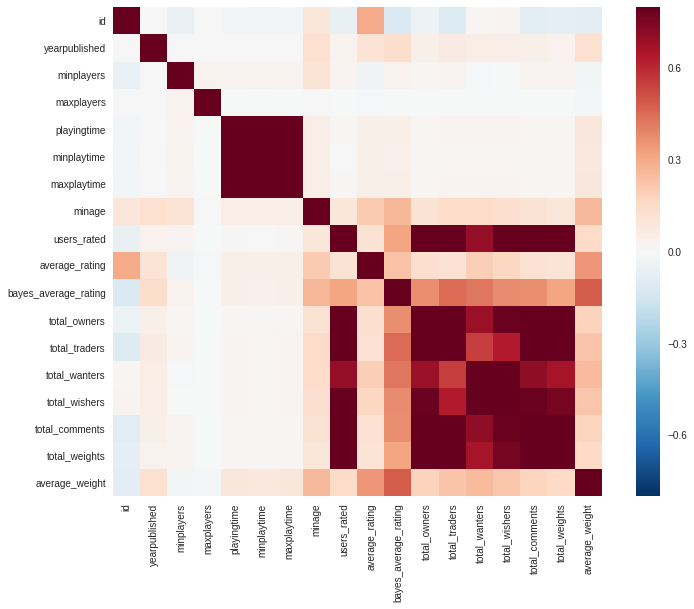

In [36]:
###Coorelation Matrix

corrmat= games.corr()

fig = plt.figure(figsize=(12,9))

sns.heatmap(corrmat, vmax=0.8, square=True)

plt.show()

In [0]:
###from this heat map we concluded that some of the columns are useless and will make regression sluggish so we'll remove them

### in order to do so we'll create a list ('col') of desired columns:

col= games.columns.tolist()

col= [c for c in col if c not in ['bayes_average_rating', 'average_rating', 'type', 'name', 'id']]

#Next,  Define XY then select suitable Model

In [0]:
#XY

X = np.array( games[col])

Y = np.array( games['average_rating'])

XTrain, XTest, YTrain, YTest = model_selection.train_test_split(X, Y, test_size=0.2)

In [0]:
#Select model

#model 1/2
from sklearn.linear_model import LinearRegression 

#model 2/2
from sklearn.ensemble import RandomForestRegressor 

#Initializing
reg1= LinearRegression()
reg2= RandomForestRegressor (n_estimators= 100, min_samples_leaf = 10 ,  random_state= seed)

#Next, Fit--Predict--Metric

In [45]:
#Fit
reg1.fit(XTrain,YTrain)


#Predict
predict1= reg1.predict(XTest)

#Metric
metrics.mean_squared_error(predict1,YTest)


2.111536102858015

In [48]:
#Fit
reg2.fit(XTrain,YTrain)


#Predict
predict2= reg2.predict(XTest)

#Metric
metrics.mean_squared_error(predict2,YTest)


1.4755965983547175